In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
iris = pd.read_csv('https://raw.githubusercontent.com/kgpark88/ai-summary/main/iris.csv')

### **Q5. 데이터 프레임 iris의 variety 컬럼을 바 플롯(bar plot)을 이용하여 시각화 하시기 바랍니다.**

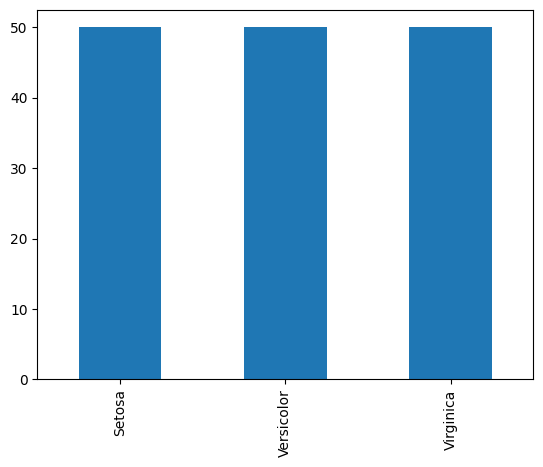

In [6]:
# bar plot
iris['variety'].value_counts().plot(kind='bar')
plt.show()

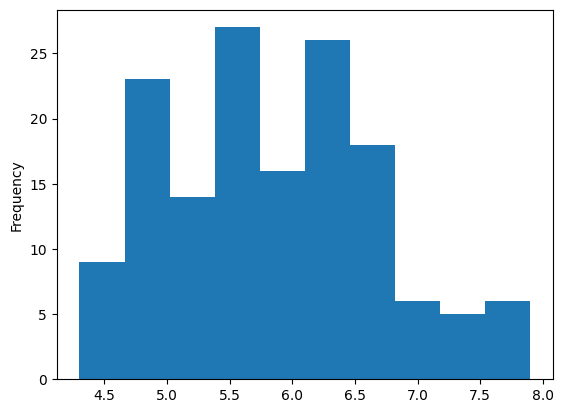

In [7]:
# 히스토 그램
iris['sepal.length'].plot(kind='hist')
plt.show()

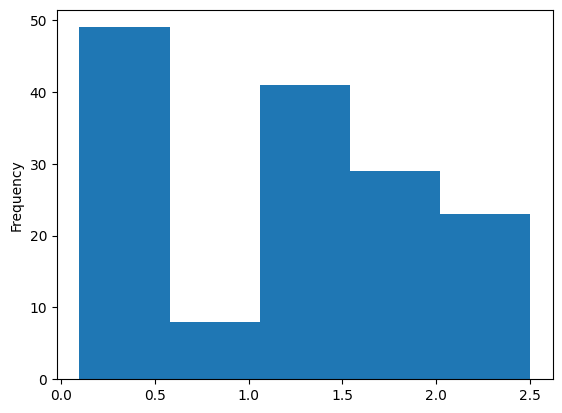

In [8]:
# 히스토 그램
iris['petal.width'].plot(kind='hist', bins=5)
plt.show()

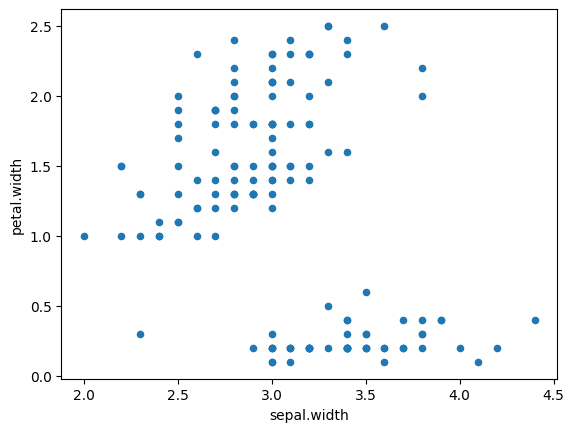

In [9]:
# 산점도
iris.plot(kind='scatter', x='sepal.width', y='petal.width')
plt.show()

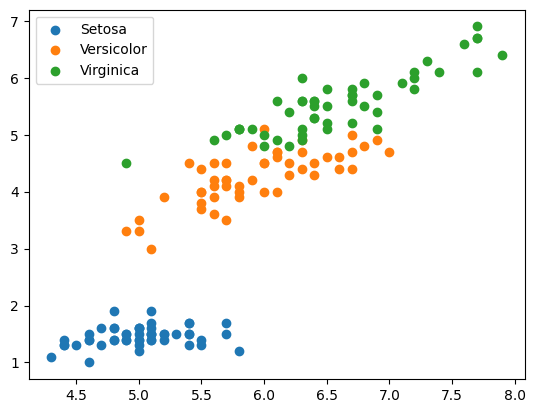

In [10]:
# 산점도, class에 따라 다른색
groups = iris.groupby('variety')
for name, group in groups :
    plt.scatter(x = 'sepal.length', y = 'petal.length', data=group, label=name)
plt.legend()
plt.show()

In [11]:
# 컬럼 sepal_ratio 를 추가
iris['sepal_ratio'] = iris['sepal.length'] / iris['sepal.width']

In [12]:
#  length_diff 를 추가
iris['length_diff'] = abs(iris['sepal.length'] - iris['petal.length'])

In [13]:
#  variety를 label encoding
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
iris['variety'] = lb.fit_transform(iris['variety'])

In [13]:
# 여기에 답안코드를 작성하세요
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
iris['variety'] = lb.fit_transform(iris['variety'])

In [14]:
# 데이터를 트레이닝셋 / 테스트셋으로 분할
x = iris.drop(['variety'], axis=1)
y = iris['variety']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2021, stratify=y)

In [15]:
# Random Forest 모델
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=30, max_depth=15, min_samples_leaf=5, random_state=2021)
forest.fit(x_train, y_train)
# forest.fit(x_train, y_train)
forest.score(x_test, y_test)

0.9333333333333333

In [18]:
x_train.shape, y_train.shape

((135, 6), (135,))

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

In [17]:
# 딥러닝 모델
keras.backend.clear_session()

model = Sequential()
model.add(Dense(36, activation='relu', input_shape=(6,)))
model.add(BatchNormalization())
model.add(Dense(36, activation='relu', input_shape=(6,)))
model.add(BatchNormalization())
model.add(Dense(12, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=2000, batch_size=32,
                    verbose=1,validation_data=(x_test, y_test),callbacks=[es])

Epoch 1/2000
5/5 [==============================] - 2s 97ms/step - loss: 1.1658 - accuracy: 0.4222 - val_loss: 1.1146 - val_accuracy: 0.4000
Epoch 2/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.7538 - accuracy: 0.6963 - val_loss: 1.0832 - val_accuracy: 0.5333
Epoch 3/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.6388 - accuracy: 0.7333 - val_loss: 1.0570 - val_accuracy: 0.5333
Epoch 4/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.5280 - accuracy: 0.7926 - val_loss: 1.0343 - val_accuracy: 0.5333
Epoch 5/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.4955 - accuracy: 0.8222 - val_loss: 1.0135 - val_accuracy: 0.6667
Epoch 6/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.4538 - accuracy: 0.8667 - val_loss: 0.9934 - val_accuracy: 0.6667
Epoch 7/2000
5/5 [==============================] - 0s 15ms/step - loss: 0.4028 - accuracy: 0.9185 - val_loss: 0.9733 - val_accuracy: 0.6667
Epoch 8/2000


Epoch 59/2000
5/5 [==============================] - 0s 13ms/step - loss: 0.0694 - accuracy: 0.9778 - val_loss: 0.1398 - val_accuracy: 0.9333
Epoch 60/2000
5/5 [==============================] - 0s 13ms/step - loss: 0.1341 - accuracy: 0.9704 - val_loss: 0.1580 - val_accuracy: 0.9333
Epoch 61/2000
5/5 [==============================] - 0s 14ms/step - loss: 0.0650 - accuracy: 0.9778 - val_loss: 0.1616 - val_accuracy: 0.9333
Epoch 62/2000
5/5 [==============================] - 0s 13ms/step - loss: 0.0602 - accuracy: 0.9852 - val_loss: 0.1622 - val_accuracy: 0.9333
Epoch 63/2000
5/5 [==============================] - 0s 13ms/step - loss: 0.0987 - accuracy: 0.9630 - val_loss: 0.1679 - val_accuracy: 0.9333
Epoch 64/2000
5/5 [==============================] - 0s 14ms/step - loss: 0.0856 - accuracy: 0.9704 - val_loss: 0.2025 - val_accuracy: 0.9333
Epoch 65/2000
5/5 [==============================] - 0s 13ms/step - loss: 0.0534 - accuracy: 0.9926 - val_loss: 0.2068 - val_accuracy: 0.9333
Epoch 

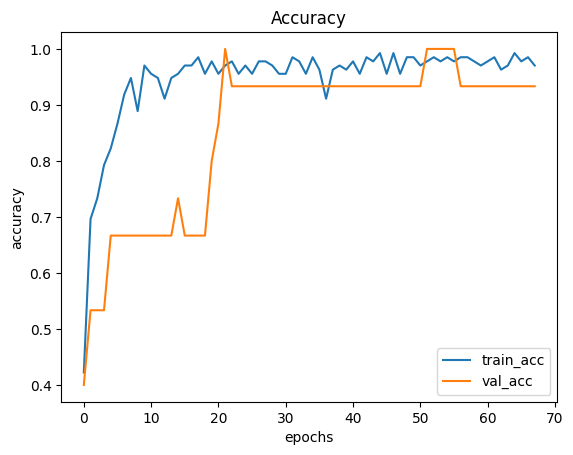

In [18]:
# 여기에 답안코드를 작성하세요
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()